# **1. Import Library**

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
import re
import string
from nltk import data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from urllib.request import urlopen
import json
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **2. Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA/esaf_terbaru.csv')


## **2.1 Data Cleaning**

### **2.1.1 Remove Duplicate**

In [ ]:
# Menemukan data duplikat berdasarkan semua kolom
duplicates_all_columns = df[df.duplicated()]

# Menampilkan jumlah total data duplikat
total_duplicates_all_columns = len(duplicates_all_columns)
print("Total data duplikat (berdasarkan semua kolom):", total_duplicates_all_columns)

Total data duplikat (berdasarkan semua kolom): 0


### **2.1.2 Remove NaN Values**

In [ ]:
# remove NaN values
total_nan_values = df.isnull().sum()
print("Total Nan Values:", total_nan_values)

Total Nan Values: created_at    0
id_str        0
full_text     0
username      0
dtype: int64


In [ ]:
# remove NaN values
df
df

,created_at,id_str,full_text,username
0,Sun Oct 29 10:43:44 +0000 2023,1718579361715310882,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan
1,Sun Oct 29 10:20:00 +0000 2023,1718573389256753332,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom
2,Sun Oct 29 02:42:13 +0000 2023,1718458184908849447,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia
3,Sun Oct 29 00:41:44 +0000 2023,1718427866294296681,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto
4,Sat Oct 28 14:26:22 +0000 2023,1718273001719025999,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork
...,...,...,...,...
1115,Sun Dec 03 02:20:47 +0000 2023,1731136366921298087,@nursidiee @jogmfs se7 sih kalo secara body ...,kuy_bangg
1116,Thu Dec 28 10:32:19 +0000 2023,1740319762100752716,@karawang_polsek Mohon bantuannya pak 1 unit ...,samosir_pendi
1117,Fri Dec 29 05:17:23 +0000 2023,1740602893756162498,@MasMasBiassaa Paling moro2 koyo rangka insaf ...,zanuaref
1118,Sun Dec 24 06:03:57 +0000 2023,1738802672860594332,Harga Resmi Motor Listrik Honda EM1 e: dan EM1...,wartakitaID


# **3. Data Preprocessing**

In [ ]:
df_esaf = df.copy()
df_esaf

,created_at,id_str,full_text,username
0,Sun Oct 29 10:43:44 +0000 2023,1718579361715310882,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan
1,Sun Oct 29 10:20:00 +0000 2023,1718573389256753332,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom
2,Sun Oct 29 02:42:13 +0000 2023,1718458184908849447,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia
3,Sun Oct 29 00:41:44 +0000 2023,1718427866294296681,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto
4,Sat Oct 28 14:26:22 +0000 2023,1718273001719025999,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork
...,...,...,...,...
1115,Sun Dec 03 02:20:47 +0000 2023,1731136366921298087,@nursidiee @jogmfs se7 sih kalo secara body ...,kuy_bangg
1116,Thu Dec 28 10:32:19 +0000 2023,1740319762100752716,@karawang_polsek Mohon bantuannya pak 1 unit ...,samosir_pendi
1117,Fri Dec 29 05:17:23 +0000 2023,1740602893756162498,@MasMasBiassaa Paling moro2 koyo rangka insaf ...,zanuaref
1118,Sun Dec 24 06:03:57 +0000 2023,1738802672860594332,Harga Resmi Motor Listrik Honda EM1 e: dan EM1...,wartakitaID


In [ ]:
# Drop kolom yang tidak dibutuhkan
esaf_new = df_esaf[['created_at', 'full_text', 'username']]
esaf_new

,created_at,full_text,username
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork
...,...,...,...
1115,Sun Dec 03 02:20:47 +0000 2023,@nursidiee @jogmfs se7 sih kalo secara body ...,kuy_bangg
1116,Thu Dec 28 10:32:19 +0000 2023,@karawang_polsek Mohon bantuannya pak 1 unit ...,samosir_pendi
1117,Fri Dec 29 05:17:23 +0000 2023,@MasMasBiassaa Paling moro2 koyo rangka insaf ...,zanuaref
1118,Sun Dec 24 06:03:57 +0000 2023,Harga Resmi Motor Listrik Honda EM1 e: dan EM1...,wartakitaID


In [ ]:
# Convert data type full_text menjadi string
esaf_new['full_text'] = esaf_new['full_text'].astype(str)

<ipython-input-10-e1aec277620c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esaf_new['full_text'] = esaf_new['full_text'].astype(str)


## **3.1 Case Folding**

In [ ]:
def case_folding(text):
  text = text.lower()
  return text

In [ ]:
esaf_new['case_folding'] = esaf_new['full_text'].apply(case_folding)
esaf_new.head(5)

,created_at,full_text,username,case_folding
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5..."
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5..."
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...


## **3.2 Cleaning Text**

In [ ]:
# Define function
def cleaningText(text):
    text = re.sub(r'@[_A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[_A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^A-Za-z ]+', ' ', text) #remove all character non alfabet

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

esaf_new['cleaning'] = esaf_new['case_folding'].apply(cleaningText)
esaf_new.head(5)

,created_at,full_text,username,case_folding,cleaning
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...


## **3.3 Tokenization**

In [ ]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

esaf_new['tokenizing'] = esaf_new['cleaning'].apply(tokenizingText)
esaf_new.head(5)

,created_at,full_text,username,case_folding,cleaning,tokenizing
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"[malah, lebih, tangguh, ketimbang, honda, rang..."
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar..."
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"[cerita, riding, dari, aceh, hingga, malang, p..."
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar..."
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"[usai, viral, rangka, esaf, yang, berkarat, cu..."


## **3.4 Convert Slangword**

In [ ]:
# slang indonesia
slangwords = pd.read_json('/content/drive/MyDrive/TA/slang_id.json', typ='series')
slangwords = slangwords.to_dict()

# define function convert
def slangWordID(t):
    t = [slangwords.get(w, w) for w in t]
    return t

esaf_new['normalisasi_kata'] = esaf_new['tokenizing'].apply(slangWordID)
esaf_new.head(5)

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"[malah, lebih, tangguh, ketimbang, honda, rang...","[bahkan, lebih, tangguh, ketimbang, honda, ran..."
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar..."
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, dari, aceh, hingga, malang, p..."
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar..."
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"[usai, viral, rangka, esaf, yang, berkarat, cu...","[usai, viral, rangka, esaf, yang, berkarat, cu..."


## **3.5 Remove Stopword**

In [ ]:
stopwords = pd.read_csv('/content/drive/MyDrive/TA/stopward.txt',  header=None)
stopwords = set(stopwords[0].tolist())

# define function
def filteringText(t):
  t = [w for w in t if w not in stopwords]
  return t

esaf_new['stopward'] = esaf_new['normalisasi_kata'].apply(filteringText)
esaf_new.head(5)

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"[malah, lebih, tangguh, ketimbang, honda, rang...","[bahkan, lebih, tangguh, ketimbang, honda, ran...","[tangguh, ketimbang, honda, rangka, esaf]"
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ..."
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, aceh, malang, pakai, scoopy, ..."
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ..."
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"[usai, viral, rangka, esaf, yang, berkarat, cu...","[usai, viral, rangka, esaf, yang, berkarat, cu...","[viral, rangka, esaf, berkarat, pt, astra, hon..."


In [ ]:
# define function token to sentence
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

esaf_new['kalimat'] = esaf_new['stopward'].apply(toSentence)
esaf_new.head(10)

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"[malah, lebih, tangguh, ketimbang, honda, rang...","[bahkan, lebih, tangguh, ketimbang, honda, ran...","[tangguh, ketimbang, honda, rangka, esaf]",tangguh ketimbang honda rangka esaf
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ...",honda jamin rangka esaf aman digaransi batas j...
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, aceh, malang, pakai, scoopy, ...",cerita riding aceh malang pakai scoopy esaf bi...
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ...",honda jamin rangka esaf aman digaransi batas j...
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"[usai, viral, rangka, esaf, yang, berkarat, cu...","[usai, viral, rangka, esaf, yang, berkarat, cu...","[viral, rangka, esaf, berkarat, pt, astra, hon...",viral rangka esaf berkarat pt astra honda moto...
5,Sat Oct 28 13:12:51 +0000 2023,Garansi Honda adalah Pengalihan isu soal eSAF.,imronvandermeer,garansi honda adalah pengalihan isu soal esaf.,garansi honda adalah pengalihan isu soal esaf,"[garansi, honda, adalah, pengalihan, isu, soal...","[garansi, honda, adalah, pengalihan, isu, soal...","[garansi, honda, pengalihan, isu, esaf]",garansi honda pengalihan isu esaf
6,Sat Oct 28 12:41:26 +0000 2023,Inget kasus rangka esaf honda? Citra nya lansu...,vitorisena,inget kasus rangka esaf honda? citra nya lansu...,inget kasus rangka esaf honda citra nya lansu...,"[inget, kasus, rangka, esaf, honda, citra, nya...","[inget, kasus, rangka, esaf, honda, citra, nya...","[inget, rangka, esaf, honda, citra, nya, lansu...",inget rangka esaf honda citra nya lansung jele...
7,Sat Oct 28 12:18:37 +0000 2023,Ini Evaluasi Honda Usai KNKT-Kemenhub Periksa ...,detikoto,ini evaluasi honda usai knkt-kemenhub periksa ...,ini evaluasi honda usai knkt kemenhub periksa ...,"[ini, evaluasi, honda, usai, knkt, kemenhub, p...","[ini, evaluasi, honda, usai, knkt, kemenhub, p...","[evaluasi, honda, knkt, kemenhub, periksa, ran...",evaluasi honda knkt kemenhub periksa rangka esaf
8,Sat Oct 28 08:30:00 +0000 2023,Honda Kini Berikan Garansi Rangka eSAF Lima Ta...,idx_channel,honda kini berikan garansi rangka esaf lima ta...,honda kini berikan garansi rangka esaf lima tahun,"[honda, kini, berikan, garansi, rangka, esaf, ...","[honda, kini, berikan, garansi, rangka, esaf, ...","[honda, garansi, rangka, esaf]",honda garansi rangka esaf
9,Sat Oct 28 07:20:30 +0000 2023,Honda: Konsumen Masih Bisa Cek Rangka eSAF di ...,uzoneindonesia,honda: konsumen masih bisa cek rangka esaf di ...,honda konsumen masih bisa cek rangka esaf di ...,"[honda, konsumen, masih, bisa, cek, rangka, es...","[honda, konsumen, masih, bisa, cek, rangka, es...","[honda, konsumen, cek, rangka, esaf, ahass, bi...",honda konsumen cek rangka esaf ahass biaya


## **3.6 Stemming**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(t): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    t = stemmer.stem(t)
    return t

esaf_new['stemming'] = esaf_new['kalimat'].apply(stemmingText)
esaf_new.head(5)

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"[malah, lebih, tangguh, ketimbang, honda, rang...","[bahkan, lebih, tangguh, ketimbang, honda, ran...","[tangguh, ketimbang, honda, rangka, esaf]",tangguh ketimbang honda rangka esaf,tangguh ketimbang honda rangka esaf
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jar...
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, dari, aceh, hingga, malang, p...","[cerita, riding, aceh, malang, pakai, scoopy, ...",cerita riding aceh malang pakai scoopy esaf bi...,cerita riding aceh malang pakai scoopy esaf bi...
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, kini, digar...","[honda, jamin, rangka, esaf, aman, digaransi, ...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jarak
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"[usai, viral, rangka, esaf, yang, berkarat, cu...","[usai, viral, rangka, esaf, yang, berkarat, cu...","[viral, rangka, esaf, berkarat, pt, astra, hon...",viral rangka esaf berkarat pt astra honda moto...,viral rangka esaf karat pt astra honda motor a...


In [ ]:
# save hasil preprocessing
esaf_new.to_csv('esafbaru_preprocessing.csv', index = False, header = True,index_label=None)
esaf_new

,Unnamed: 0,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming,text_preprocessed,polarity_score,polarity
0,NaN,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"['malah', 'lebih', 'tangguh', 'ketimbang', 'ho...","['bahkan', 'lebih', 'tangguh', 'ketimbang', 'h...","['tangguh', 'ketimbang', 'honda', 'rangka', 'e...",tangguh ketimbang honda rangka esaf,tangguh ketimbang honda rangka esaf,"['tangguh', 'ketimbang', 'honda', 'rangka', 'e...",3,positive
1,NaN,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jar...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",-18,negative
2,NaN,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'aceh', 'malang', 'pakai'...",cerita riding aceh malang pakai scoopy esaf bi...,cerita riding aceh malang pakai scoopy esaf bi...,"['cerita', 'riding', 'aceh', 'malang', 'pakai'...",-18,negative
3,NaN,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jarak,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",-8,negative
4,NaN,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['viral', 'rangka', 'esaf', 'berkarat', 'pt', ...",viral rangka esaf berkarat pt astra honda moto...,viral rangka esaf karat pt astra honda motor a...,"['viral', 'rangka', 'esaf', 'karat', 'pt', 'as...",-2,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,NaN,@nursidiee @jogmfs se7 sih kalo secara body ...,kuy_bangg,@nursidiee @jogmfs se7 sih kalo secara body ...,se sih kalo secara body rangka sparepart me...,"['se', 'sih', 'kalo', 'secara', 'body', 'rangk...","['se', 'sih', 'kalau', 'secara', 'body', 'rang...","['sih', 'body', 'rangka', 'sparepart', 'lebih ...",sih body rangka sparepart lebih baik yamaha ho...,sih body rangka sparepart lebih baik yamaha ho...,"['sih', 'body', 'rangka', 'sparepart', 'lebih'...",5,positive
1114,NaN,@karawang_polsek Mohon bantuannya pak 1 unit ...,samosir_pendi,@karawang_polsek mohon bantuannya pak 1 unit ...,mohon bantuannya pak unit motor saya hilang ...,"['mohon', 'bantuannya', 'pak', 'unit', 'motor'...","['mohon', 'bantuannya', 'pak', 'unit', 'motor'...","['mohon', 'bantuannya', 'unit', 'motor', 'hila...",mohon bantuannya unit motor hilang lapangan pu...,mohon bantu unit motor hilang lapang putsal ka...,"['mohon', 'bantu', 'unit', 'motor', 'hilang', ...",-13,negative
1115,NaN,@MasMasBiassaa Paling moro2 koyo rangka insaf ...,zanuaref,@masmasbiassaa paling moro2 koyo rangka insaf ...,paling moro koyo rangka insaf e honda,"['paling', 'moro', 'koyo', 'rangka', 'insaf', ...","['paling', 'moro', 'koyo', 'rangka', 'insaf', ...","['moro', 'koyo', 'rangka', 'insaf', 'e', 'honda']",moro koyo rangka insaf e honda,moro koyo rangka insaf e honda,"['moro', 'koyo', 'rangka', 'insaf', 'e', 'h

# **4. Pelabelan Data**

## **4.1 Load Lexicon (InSet)**

In [ ]:
esaf_new = pd.read_csv("/content/drive/MyDrive/TA/esafbaru_preprocessing.csv")

## **4.2 Proses Pelabelan Sentimen**

In [ ]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/TA/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/TA/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    else:
        polarity = 'negative'
    return score, polarity

In [ ]:
# Menghapus baris dengan nilai NaN pada kolom 'stemming'
esaf_new = esaf_new.dropna(subset=['stemming'])
esaf_new

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"['malah', 'lebih', 'tangguh', 'ketimbang', 'ho...","['bahkan', 'lebih', 'tangguh', 'ketimbang', 'h...","['tangguh', 'ketimbang', 'honda', 'rangka', 'e...",tangguh ketimbang honda rangka esaf,tangguh ketimbang honda rangka esaf
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jar...
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'aceh', 'malang', 'pakai'...",cerita riding aceh malang pakai scoopy esaf bi...,cerita riding aceh malang pakai scoopy esaf bi...
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jarak
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['viral', 'rangka', 'esaf', 'berkarat', 'pt', ...",viral rangka esaf berkarat pt astra honda moto...,viral rangka esaf karat pt astra honda motor a...
...,...,...,...,...,...,...,...,...,...,...
1115,Sun Dec 03 02:20:47 +0000 2023,@nursidiee @jogmfs se7 sih kalo secara body ...,kuy_bangg,@nursidiee @jogmfs se7 sih kalo secara body ...,se sih kalo secara body rangka sparepart me...,"['se', 'sih', 'kalo', 'secara', 'body', 'rangk...","['se', 'sih', 'kalau', 'secara', 'body', 'rang...","['sih', 'body', 'rangka', 'sparepart', 'lebih ...",sih body rangka sparepart lebih baik yamaha ho...,sih body rangka sparepart lebih baik yamaha ho...
1116,Thu Dec 28 10:32:19 +0000 2023,@karawang_polsek Mohon bantuannya pak 1 unit ...,samosir_pendi,@karawang_polsek mohon bantuannya pak 1 unit ...,mohon bantuannya pak unit motor saya hilang ...,"['mohon', 'bantuannya', 'pak', 'unit', 'motor'...","['mohon', 'bantuannya', 'pak', 'unit', 'motor'...","['mohon', 'bantuannya', 'unit', 'motor', 'hila...",mohon bantuannya unit motor hilang lapangan pu...,mohon bantu unit motor hilang lapang putsal ka...
1117,Fri Dec 29 05:17:23 +0000 2023,@MasMasBiassaa Paling moro2 koyo rangka insaf ...,zanuaref,@masmasbiassaa paling moro2 koyo rangka insaf ...,paling moro koyo rangka insaf e honda,"['paling', 'moro', 'koyo', 'rangka', 'insaf', ...","['paling', 'moro', 'koyo', 'rangka', 'insaf', ...","['moro', 'koyo', 'rangka', 'insaf', 'e', 'honda']",moro koyo rangka insaf e honda,moro koyo rangka insaf e honda
1118,Sun Dec 24 06:03:57 +0000 2023,Harga Resmi Motor Listrik Honda EM1 e: dan EM1...,wartakitaID,harga resmi motor listrik honda em1 e: dan em1...,harga resmi motor listrik honda em e dan em e...,"['harga', 'resmi', 'motor', 'listrik', 'honda'...","['harga', 'resmi', 'motor', 'listrik', 'honda'...","['harga', 'resmi', 'motor', '

In [ ]:
esaf_new['text_preprocessed'] = esaf_new['stemming'].apply(tokenizingText)
esaf_new['text_preprocessed']

0               [tangguh, ketimbang, honda, rangka, esaf]
1       [honda, jamin, rangka, esaf, aman, garansi, ba...
2       [cerita, riding, aceh, malang, pakai, scoopy, ...
3       [honda, jamin, rangka, esaf, aman, garansi, ba...
4       [viral, rangka, esaf, karat, pt, astra, honda,...
                              ...                        
1115    [sih, body, rangka, sparepart, lebih, baik, ya...
1116    [mohon, bantu, unit, motor, hilang, lapang, pu...
1117                [moro, koyo, rangka, insaf, e, honda]
1118    [harga, resmi, motor, listrik, honda, em, e, e...
1119    [rangka, ahass, prima, motor, ada, program, ha...
Name: text_preprocessed, Length: 1118, dtype: object

In [ ]:
results = esaf_new['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
esaf_new['polarity_score'] = results[0]
esaf_new['polarity'] = results[1]
print(esaf_new['polarity'].value_counts())

polarity
negative    807
positive    311
Name: count, dtype: int64


In [ ]:
esaf_new.to_csv('hasil_labeling_esaf_inset.csv', index = False, header = True,index_label=None)
esaf_new.head()

,created_at,full_text,username,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming,text_preprocessed,polarity_score,polarity
0,Sun Oct 29 10:43:44 +0000 2023,@PorosHalangID Malah lebih tangguh ketimbang h...,poetrahermawan,@poroshalangid malah lebih tangguh ketimbang h...,malah lebih tangguh ketimbang honda rangka esaf,"['malah', 'lebih', 'tangguh', 'ketimbang', 'ho...","['bahkan', 'lebih', 'tangguh', 'ketimbang', 'h...","['tangguh', 'ketimbang', 'honda', 'rangka', 'e...",tangguh ketimbang honda rangka esaf,tangguh ketimbang honda rangka esaf,"[tangguh, ketimbang, honda, rangka, esaf]",3,positive
1,Sun Oct 29 10:20:00 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikcom,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jar...,"[honda, jamin, rangka, esaf, aman, garansi, ba...",-18,negative
2,Sun Oct 29 02:42:13 +0000 2023,Cerita Riding dari Aceh Hingga Malang Pakai Sc...,otosia,cerita riding dari aceh hingga malang pakai sc...,cerita riding dari aceh hingga malang pakai sc...,"['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'dari', 'aceh', 'hingga',...","['cerita', 'riding', 'aceh', 'malang', 'pakai'...",cerita riding aceh malang pakai scoopy esaf bi...,cerita riding aceh malang pakai scoopy esaf bi...,"[cerita, riding, aceh, malang, pakai, scoopy, ...",-18,negative
3,Sun Oct 29 00:41:44 +0000 2023,"Honda Jamin Rangka eSAF Aman, Kini Digaransi 5...",detikoto,"honda jamin rangka esaf aman, kini digaransi 5...",honda jamin rangka esaf aman kini digaransi ...,"['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...","['honda', 'jamin', 'rangka', 'esaf', 'aman', '...",honda jamin rangka esaf aman digaransi batas j...,honda jamin rangka esaf aman garansi batas jarak,"[honda, jamin, rangka, esaf, aman, garansi, ba...",-8,negative
4,Sat Oct 28 14:26:22 +0000 2023,Usai viral rangka eSAF yang berkarat cukup mem...,kliknetwork,usai viral rangka esaf yang berkarat cukup mem...,usai viral rangka esaf yang berkarat cukup mem...,"['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['usai', 'viral', 'rangka', 'esaf', 'yang', 'b...","['viral', 'rangka', 'esaf', 'berkarat', 'pt', ...",viral rangka esaf berkarat pt astra honda moto...,viral rangka esaf karat pt astra honda motor a...,"[viral, rangka, esaf, karat, pt, astra, honda,...",-2,negative


#Data Split

In [ ]:
#Data Training : 80% hasil pelabelan otomatis dengan Inset
#Data Testing  : 20% hasil pelabelan manual

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

In [ ]:
# Muat dataset training dan testing dari file CSV
df_train = pd.read_csv('/content/drive/MyDrive/TA/data_training.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TA/data_tst.csv')


In [ ]:
df_train

,kalimat,label
0,tangguh ketimbang honda rangka esaf,1
1,honda jamin rangka esaf aman digaransi batas j...,0
2,cerita riding aceh malang pakai scoopy esaf bi...,0
3,honda jamin rangka esaf aman digaransi batas j...,0
4,viral rangka esaf berkarat pt astra honda moto...,0
...,...,...
987,tantang ros in bhkl konsumen kayak esaf rangka...,0
988,motor kmren ramai honda esaf iya gampang bange...,0
989,asli emak cerita masuk komunitas motor honda m...,0
990,harga jual honda esaf daihatsu toyota uji tabr...,1


In [ ]:
df_test

,kalimat,label
0,peduli batalin beli honda genio beralih yamaha...,1
1,mantap wir honda giorno cocok banget kaum ciwi...,1
2,honda gak pakai rangka esaf yah,0
3,mantaap kakak pengalaman menarik rasio motor h...,0
4,isu bohong kawan dealer rumahan kebanjiran ord...,0
...,...,...
243,pirsa beli motor honda imos ratus motor honda ...,0
244,ciamik soro pirsa beli motor honda matic honda...,0
245,kemenhub gandeng knkt teliti rangka esaf seped...,0
246,drama isu rangka esaf honda berani kasih garan...,0


#TF_IDF

In [ ]:
# Praproses data teks menggunakan TF-IDF
vectorizer = TfidfVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(df_train['kalimat'])
y_train = df_train['label']


In [ ]:
X_test = vectorizer.transform(df_test['kalimat'])
y_test = df_test['label']

#Modelling


In [ ]:
svm = svm.SVC(kernel="linear")
model_svm = svm.fit(X_train, y_train)

#Simpan Hasil Training
dump(model_svm, filename='model_svm.joblib')

['model_svm.joblib']

In [ ]:
model_pred_svm = model_svm.predict(X_test)

#Evaluasi

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test).sum()
prediksi_salah_svm = (model_pred_svm != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')

Jumlah prediksi benar	: 186
Jumlah prediksi salah	: 62
Akurasi pengujian	: 75.0 %


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred_svm))

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84       167
           1       0.79      0.32      0.46        81

    accuracy                           0.75       248
   macro avg       0.77      0.64      0.65       248
weighted avg       0.76      0.75      0.71       248



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_pred_svm))

Confusion Matrix:
[[160   7]
 [ 55  26]]


In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_test,model_pred_svm)
cm_svm = pd.DataFrame(cm,index = ['Negative','Positive'], columns = ['Negative','Positive',])

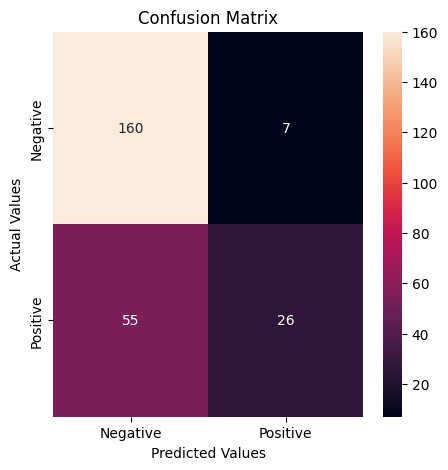

In [ ]:
import seaborn as sns

#Memanggil Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()